# Import the libraries

In [92]:
import pandas as pd
import numpy as np
import seaborn as sns                       #visualisation
import matplotlib.pyplot as plt             #visualisation
 
sns.set(color_codes=True)
#to ignore warnings
import warnings
warnings.filterwarnings('ignore')

## Load the dataset

In [93]:
df = pd.read_csv("Problem 1/purchase.csv")
# To display the top 5 rows 
df.head(5) 

,PURCHASE_DATE,MAGIC_KEY,BOX_ID,BOX_COUNT
0,1/2/2019,2CED678A247,12.0,1.0
1,1/2/2019,2BF58D91BA1,12.0,1.0
2,1/2/2019,2C15B86534E,99.0,1.0
3,1/2/2019,2C32D9A859A,6.0,1.0
4,1/2/2019,2C7A55404D1,4.0,1.0


In [94]:
df.tail(5)  

,PURCHASE_DATE,MAGIC_KEY,BOX_ID,BOX_COUNT
2455859,28/10/2018,2BD992B5538,12.0,1.0
2455860,28/10/2018,2C97CD72233,17.0,1.0
2455861,28/10/2018,2C91C61D372,40.0,1.0
2455862,28/10/2018,2CD70CFC4E3,51.0,1.0
2455863,28/10/2018,2C4792A5B84,4.0,1.0


# Understanding the data

In [95]:
# Checking the types of data
df.dtypes

PURCHASE_DATE     object
MAGIC_KEY         object
BOX_ID           float64
BOX_COUNT        float64
dtype: object

In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2455864 entries, 0 to 2455863
Data columns (total 4 columns):
 #   Column         Dtype  
---  ------         -----  
 0   PURCHASE_DATE  object 
 1   MAGIC_KEY      object 
 2   BOX_ID         float64
 3   BOX_COUNT      float64
dtypes: float64(2), object(2)
memory usage: 74.9+ MB


In [97]:
df.columns

Index(['PURCHASE_DATE', 'MAGIC_KEY', 'BOX_ID', 'BOX_COUNT'], dtype='object')

In [98]:
df.nunique()
df['BOX_COUNT'].unique() 
#**Optional: If you want to see what are unique values you have in particular column**

array([ 1., nan, -1.,  2.,  4.,  3.,  8.,  6.,  5.,  7.,  9., 19., 10.,
       11., 13.])

In [99]:
df['BOX_COUNT'].unique().shape 

(15,)

In [100]:
df.describe(include='all')

,PURCHASE_DATE,MAGIC_KEY,BOX_ID,BOX_COUNT
count,2455864,2455864,2.455817e+06,2.455817e+06
unique,151,1274108,NaN,NaN
top,28/2/2019,2CC2011C2DF,NaN,NaN
freq,46984,40,NaN,NaN
mean,NaN,NaN,2.308802e+02,1.001121e+00
std,NaN,NaN,2.923330e+04,4.467255e-02
min,NaN,NaN,1.000000e+00,-1.000000e+00
25%,NaN,NaN,1.060000e+02,1.000000e+00
50%,NaN,NaN,1.430000e+02,1.000000e+00
75%,NaN,NaN,2.150000e+02,1.000000e+00


In [101]:
df.isnull().sum()

PURCHASE_DATE     0
MAGIC_KEY         0
BOX_ID           47
BOX_COUNT        47
dtype: int64

In [102]:
# The below code helps to calculate the percentage of missing values in each column
(df.isnull().sum()/(len(df)))*100

PURCHASE_DATE    0.000000
MAGIC_KEY        0.000000
BOX_ID           0.001914
BOX_COUNT        0.001914
dtype: float64

In the below fig, a histogram and box plot is used to show the pattern of the variables, as some variables have skewness and outliers.

In [ ]:
cat_cols=df.select_dtypes(include=['object']).columns
num_cols = df.select_dtypes(include=np.number).columns.tolist()
for col in num_cols:
    print(col)
    print('Skew :', round(df[col].skew(), 2))
    plt.figure(figsize = (15, 4))
    plt.subplot(1, 2, 1)
    df[col].hist(grid=False)
    plt.ylabel('count')
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[col])
    plt.show()

In [ ]:
# this may not work
fig, axes = plt.subplots(1, 2, figsize = (18, 18))
fig.suptitle('Bar plot for all categorical variables in the dataset')
sns.countplot(ax = axes[0, 0], x = 'PURCHASE_DATE', data = df, color = 'blue', 
              order = df['PURCHASE_DATE'].value_counts().index);
sns.countplot(ax = axes[0, 1], x = 'MAGIC_KEY', data = df, color = 'blue', 
              order = df['MAGIC_KEY'].value_counts().index);

axes[1][1].tick_params(labelrotation=45);
axes[2][0].tick_params(labelrotation=90);
axes[2][1].tick_params(labelrotation=90);

# Dealing with duplicate rows and nan values

In [103]:
print(f"Data Frame Shape: {df.shape}")
df = df.dropna() # dropping nan value rows

Data Frame Shape: (2455864, 4)


In [104]:
print(f"Data Frame Shape: {df.shape}")
duplicate_rows_df = df[df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)

Data Frame Shape: (2455817, 4)
number of duplicate rows:  (77, 4)


In [105]:
df.count()  

PURCHASE_DATE    2455817
MAGIC_KEY        2455817
BOX_ID           2455817
BOX_COUNT        2455817
dtype: int64

In [106]:
df = df.drop_duplicates()
df.head(5)

,PURCHASE_DATE,MAGIC_KEY,BOX_ID,BOX_COUNT
0,1/2/2019,2CED678A247,12.0,1.0
1,1/2/2019,2BF58D91BA1,12.0,1.0
2,1/2/2019,2C15B86534E,99.0,1.0
3,1/2/2019,2C32D9A859A,6.0,1.0
4,1/2/2019,2C7A55404D1,4.0,1.0


In [107]:
df.count()

PURCHASE_DATE    2455740
MAGIC_KEY        2455740
BOX_ID           2455740
BOX_COUNT        2455740
dtype: int64

## Dropping negative box count rows

In [108]:
# Filter rows where BOX_COUNT equals -1
rows_with_negative_box_count = df[df['BOX_COUNT'] == -1]
# Print the resulting DataFrame
print(rows_with_negative_box_count)
rows_with_negative_box_count.shape 


        PURCHASE_DATE    MAGIC_KEY      BOX_ID  BOX_COUNT
191          1/2/2019  2CCB122460D  11111111.0       -1.0
192          1/2/2019  2CEDA71E3E9  11111111.0       -1.0
193          1/2/2019  2CBDC970258  11111111.0       -1.0
194          1/2/2019  2932761FEB6  11111111.0       -1.0
195          1/2/2019  28F09714410  11111111.0       -1.0
196          1/2/2019  2BDAE37A00E  11111111.0       -1.0
197          1/2/2019  2C3C7E168F7  11111111.0       -1.0
525713      27/2/2019  2C3C7E168F7  11111111.0       -1.0
597615       1/1/2019  2CEDA71E3E9  11111111.0       -1.0
665861       5/1/2019  2C3C7E168F7  11111111.0       -1.0
688095       6/1/2019  2CBDC970258  11111111.0       -1.0
1251257    10/12/2018  2C3C7E168F7  11111111.0       -1.0
1834669    10/11/2018  2C3C7E168F7  11111111.0       -1.0
1943916    24/11/2018  2CBDC970258  11111111.0       -1.0
2002908     5/10/2018  2CBDC970258  11111111.0       -1.0
2105309    13/10/2018  2BDAE37A00E  11111111.0       -1.0
2123428    12/

(17, 4)

In [109]:
# Create a boolean mask to identify rows with positive box count
positive_box_count_mask = df['BOX_COUNT'] >= 0

# Filter the DataFrame to keep only rows with positive box count
df = df[positive_box_count_mask]

In [110]:
df.count()

PURCHASE_DATE    2455723
MAGIC_KEY        2455723
BOX_ID           2455723
BOX_COUNT        2455723
dtype: int64

In [89]:
# array([ 1.,  2.,  4.,  3.,  8.,  6.,  5.,  7.,  9., 19., 10., 11., 13.]) ######## 2272+28+83+1+17+10+3+2+2+1+2+1
temp = df[df['BOX_COUNT'] == 13]
temp.shape

(1, 4)

2422

# Detecting Outliers

<Axes: xlabel='BOX_ID'>

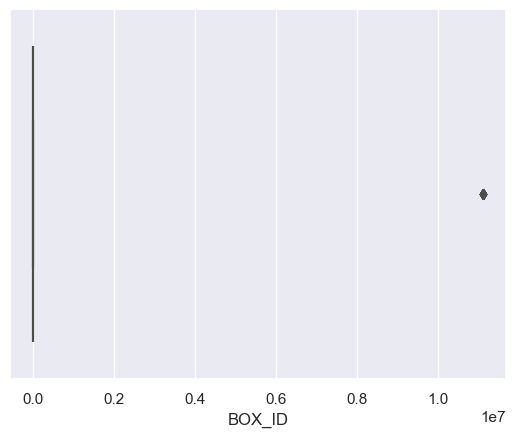

In [52]:
sns.boxplot(x=df['BOX_ID'])

<Axes: xlabel='BOX_COUNT'>

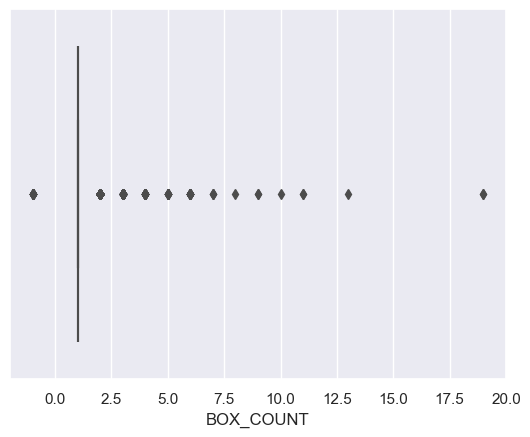

In [53]:
sns.boxplot(x=df['BOX_COUNT'])